<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 2</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 25. April, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Zellulärer Automat</td>
<td style="border-style: none; width: 1%; text-align: right">(6 Bonuspunkte)</td></tr></table>



In dieser *optionalen Aufgabe* betrachten wir einen **zellulären Automaten**, dessen Zellen durch drei Parameter $a, b, c \in [0, 1)$ beschrieben werden, welche die Konzentration dreier Spezies beschreiben sollen. Zu Anfang seien die Werte zufällig aus dem möglichen Wertebereich gewählt. 

Der zelluläre Automat funktioniert nun nach den folgenden Regeln:
* Für jede Zelle wird der durchschnittliche Wert $\overline{a}, \overline{b}, \overline{c}$ als Mittelwert der acht umgebenden Zellen sowie des Werts der Zelle selbst berechnet.
* Der neue Zustand ist dann gegeben durch

$\quad a = \min\left(1.0,\; \overline{a}\cdot\left(1. + \overline{b} - \overline{c}\right)\right)$

$\quad b = \min\left(1.0,\; \overline{b}\cdot \left(1. + \overline{c} - \overline{a}\right)\right)$

$\quad c = \min\left(1.0,\; \overline{c}\cdot \left(1. + \overline{a} - \overline{b}\right)\right)$

Beachten Sie, dass alle Zellen *gleichzeitig* in den neuen Zustand übergehen, d.h. die Berechnung der Mittelwerte darf ausschließlich mit den Werten des vorherigen Iterationsschritts passieren und nicht mit denen der schon partiell veränderten Matrix.

In den unteren beiden Zellen finden Sie ein Skelett, das Sie um das Update der Zellen erweitern sollen. Visualisiert werden kann der zelluäre Automat, indem eine der drei Konzentrationen dargestellt wird. Dazu stellen wir Ihnen die Funktion *update_image* zur Verfügung, mit der Sie die Änderung der Konzentrationen zeitlich aufgelöst verfolgen können. 

In [1]:
### functions

function update_image(fig, image, data)
    image[:set_data](data)
    if external_window == false
        IJulia.clear_output(true)
        display(fig)
    else
        fig[:canvas][:draw]()
    end
end

function get_cells(allcells, xes, ys)
    cells = []
    for i in xes
        for j in ys
            push!(cells, allcells[i,j])
        end
    end
    return cells
end

function get_means(array)
    s = sum(array)
    n = length(array)
    return s/n
end

function calc_new(a, b, c)
    return min(1.0, a * (1.0 + b - c))
end

calc_new (generic function with 1 method)

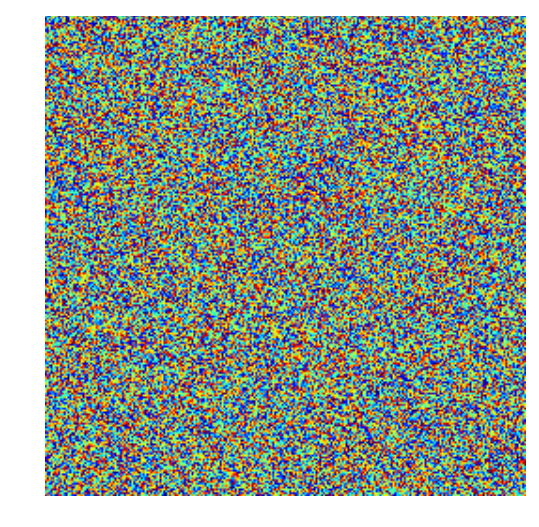

(-0.5,255.5,255.5,-0.5)

In [2]:
### other

using PyPlot

external_window = false

try
    pygui(true) # activate display in external window
    external_window = true
catch e # probably in JuliaBox
end

L = 256 # system size

automaton_a = rand(L, L)
automaton_b = rand(L, L)
automaton_c = rand(L, L)

coarse_automaton_a = zeros(L, L)
coarse_automaton_b = zeros(L, L)
coarse_automaton_c = zeros(L, L)

fig = figure()
ax = fig[:add_subplot](111)
image = imshow(automaton_a)
axis("off")

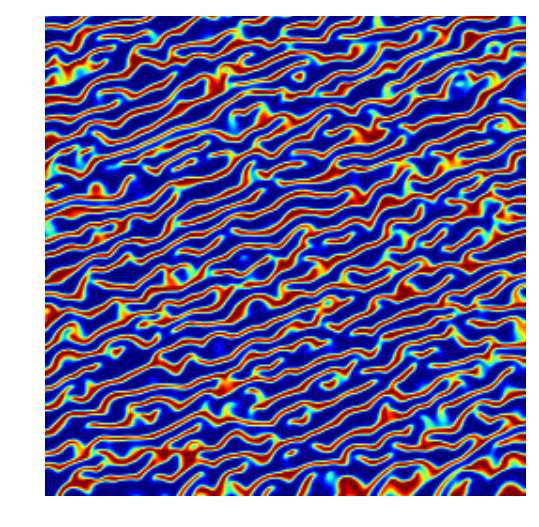

In [3]:
for step in 1:20#0
    # for: get coordinates
    for x in 1:L
        xes = [x-1,x,x+1]
        for y in 1:L
            ys = [y-1,y,y+1]
            # delete impossible coordinates
            for array in (xes, ys)
                deleteat!(array, findin(array, 0))
                deleteat!(array, findin(array, L+1))
            end
            
            # get cell and 8 next cells
            as = get_cells(automaton_a, xes, ys)
            bs = get_cells(automaton_b, xes, ys)
            cs = get_cells(automaton_c, xes, ys)
            
            # get a_bar_new etc
            a_bar = get_means(as)
            b_bar = get_means(bs)
            c_bar = get_means(cs)
            
            # calc a_new etc, save them to tmp array
            coarse_automaton_a[x, y] = calc_new(a_bar, b_bar, c_bar)
            coarse_automaton_b[x, y] = calc_new(b_bar, c_bar, a_bar)
            coarse_automaton_c[x, y] = calc_new(c_bar, a_bar, b_bar)
        end
    end
    
    # save tmp to arrays
    automaton_a = coarse_automaton_a
    automaton_b = coarse_automaton_b
    automaton_c = coarse_automaton_c

    # updated automaton_a is set as the new image
    update_image(fig, image, automaton_a)
end

if external_window == false
    close()
end